In [2]:
%matplotlib inline
import importlib
import utils2; importlib.reload(utils2)
from utils2 import *

Using TensorFlow backend.
/home/flend/anaconda3/envs/pytorch/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import torch_utils; importlib.reload(torch_utils)
from torch_utils import *

In [4]:
def show(img, fs=(6,6)):
    plt.figure(figsize = fs)
    plt.imshow(np.transpose((img/2+0.5).clamp(0,1).numpy(), (1,2,0)), interpolation='nearest')

In [5]:
def create_noise(b): 
    return Variable(FT(b, nz, 1, 1).cuda().normal_(0, 1))

In [6]:
# Fixed noise used just for visualizing images when done
bs,sz,nz = 64,64,100
fixed_noise = create_noise(bs)

Running e7667c0d8e5d3c75116705ef7b2122c394500b90
Stopped then continued again, running time in total about 18 hrs
Weights in digger_weights2
gen_1170.pt was before the pause

In [23]:
checkpoint1 = torch.load("digger_weights2/gen_1170.pt")
checkpoint2 = torch.load("digger_weights2/gen_epoch_1401.pt")

In [24]:
fake1 = checkpoint1(fixed_noise).data.cpu()
fake2 = checkpoint2(fixed_noise).data.cpu()

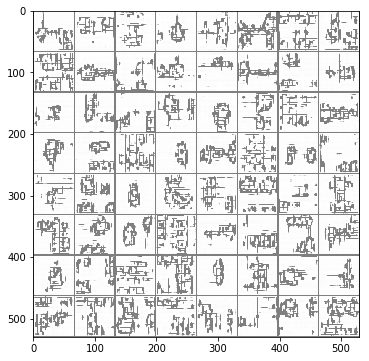

In [25]:
show(vutils.make_grid(fake1))

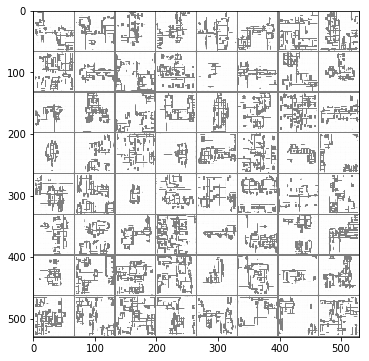

In [26]:
show(vutils.make_grid(fake2))

In [ ]:
Note that these are being run on the same input noise vector, so may look similar

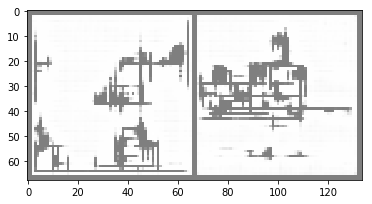

In [34]:
show(vutils.make_grid(fake1[10:12,:,:,:]))

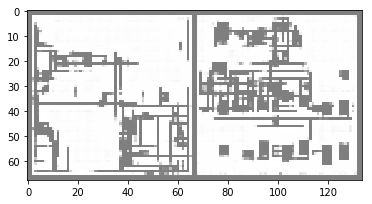

In [33]:
show(vutils.make_grid(fake2[10:12,:,:,:]))

In [ ]:
In general, the model (2) trained overnight for an extra 8 hours tends to have sharper features - it's learnt to do rectangles better